# Test the Bayesian isochrone code

In [2]:
import numpy as np
import pandas as pd

import os, sys, tqdm, copy

import tqdm
import tqdm.notebook

import matplotlib.pyplot as plt
import matplotlib

style = [
    'seaborn-ticks',
    {
        'figure.dpi': 300,
        'font.size': 12,
        'image.cmap': 'inferno',
        'font.family': 'serif',
        'font.serif': ['Times', 'Times New Roman'] + plt.rcParams['font.serif'],
        'xtick.top': True,
        'xtick.direction': 'in',
        'ytick.right': True,
        'ytick.direction': 'in',
        'mathtext.fontset': 'cm'
        }]
plt.style.use(style)

agepro_dir = '/home/dingshandeng/github/DataCalibration/'
sys.path.append(os.path.join(agepro_dir, 'AGE-PRO-analysis/', 'Image_Plots/'))
import sources as ss

import scipy.io

In [3]:
github_dir = '/home/dingshandeng/github/ysoisochrone/'

os.chdir(os.path.join(github_dir, 'tests'))
sys.path.append(os.path.join(github_dir))
import ysoisochrone.utils as utils
import ysoisochrone.bayesian

### Load the AGE-PRO Lupus file

In [4]:
AP_data_dir = '/home/dingshandeng/github/DataCalibration/AGE-PRO-analysis/Data_analysis_n_General_Plots'

df_AP_LP_st = pd.read_csv(AP_data_dir+'/data/Table_AGEPRO_Lupus_stellar_parameters.csv')

file_dir_Manara = os.path.join(agepro_dir, 'ManaraPPVII-data_and_others/')
agepro_alcala_data = pd.read_csv(os.path.join(file_dir_Manara, 'Alcala+2017_table_A2_stellar_properties - Sheet2.csv'))

teff_err = np.zeros(len(agepro_alcala_data))
luminosity_star_err = np.zeros(len(agepro_alcala_data))
mstar_err = np.zeros(len(agepro_alcala_data))
for ii in agepro_alcala_data.index:
    luminosity_star_err[ii] = np.float64(agepro_alcala_data.loc[ii, 'Lstar (err)[Lsun]'].split('(')[1][0:-1])
    teff_err[ii] = np.float64(agepro_alcala_data.loc[ii, 'Teff (err)[K]'].split('(')[1][0:-1])
    mstar_err[ii] = np.float64(agepro_alcala_data.loc[ii, 'Mstar(S00) (err)[Msun]'].split('(')[1][0:-1])

df_prop = copy.deepcopy(df_AP_LP_st)

# df_prop['Source'] = df_prop['Source']
df_prop['Teff'] = df_prop['Teff_xs']
df_prop['Luminosity'] = df_prop['Lstar_xs_DR3']
df_prop['e_Teff'] = teff_err
df_prop['e_Luminosity'] = luminosity_star_err
# print(df_prop.columns)

# For AGE-PRO UScous targets
toobright = [] # ['0']  
toofaint = [] # ['0']
median_age = 1.0 # Myrs	

# only select part of the data
df_prop = df_prop.loc[:2]

# df_output = df_prop.loc[:, ['Source', 'Teff', 'e_Teff', 'Luminosity', 'e_Luminosity']]
# df_output.to_csv('./target_info.csv', index=False)

In [5]:
# ii = 2

# L_this = df_prop.loc[ii, 'Luminosity']
# T_this = df_prop.loc[ii, 'Teff']
# c_logL = np.log10(L_this)
# c_logT = np.log10(T_this)

# # Initialize the isochrone class with default data directory
# isochrone = ysoisochrone.isochrone.Isochrone()

# isochrone.set_tracks('Baraffe2015')

# # Get the tracks
# log_age_dummy, masses_dummy, logtlogl_dummy = isochrone.get_tracks()

# err_L_this = df_prop.loc[ii, 'e_Luminosity']
# sigma_logL = utils.unc_log10(L_this, err_L_this)

# err_T_this = df_prop.loc[ii, 'e_Teff']
# sigma_logT = utils.unc_log10(T_this, err_T_this)

# # Compute the likelihood using the Bayesian framework
# lfunc = utils.get_likelihood_andrews2013(logtlogl_dummy, c_logT, c_logL, sigma_logT, sigma_logL)

# lfunc[np.isnan(lfunc)] = 1e-99

# bayes_res, lage_res, lmass_res = ysoisochrone.bayesian.bayesian_mass_age(log_age_dummy, np.log10(masses_dummy), lfunc, plot=True)

### Run the code

Derive stellar mass assuming age

Working on: Sz65
Best match for Sz65: Age = 1.50e+06 yrs, Mass = 7.08e-01 Msun


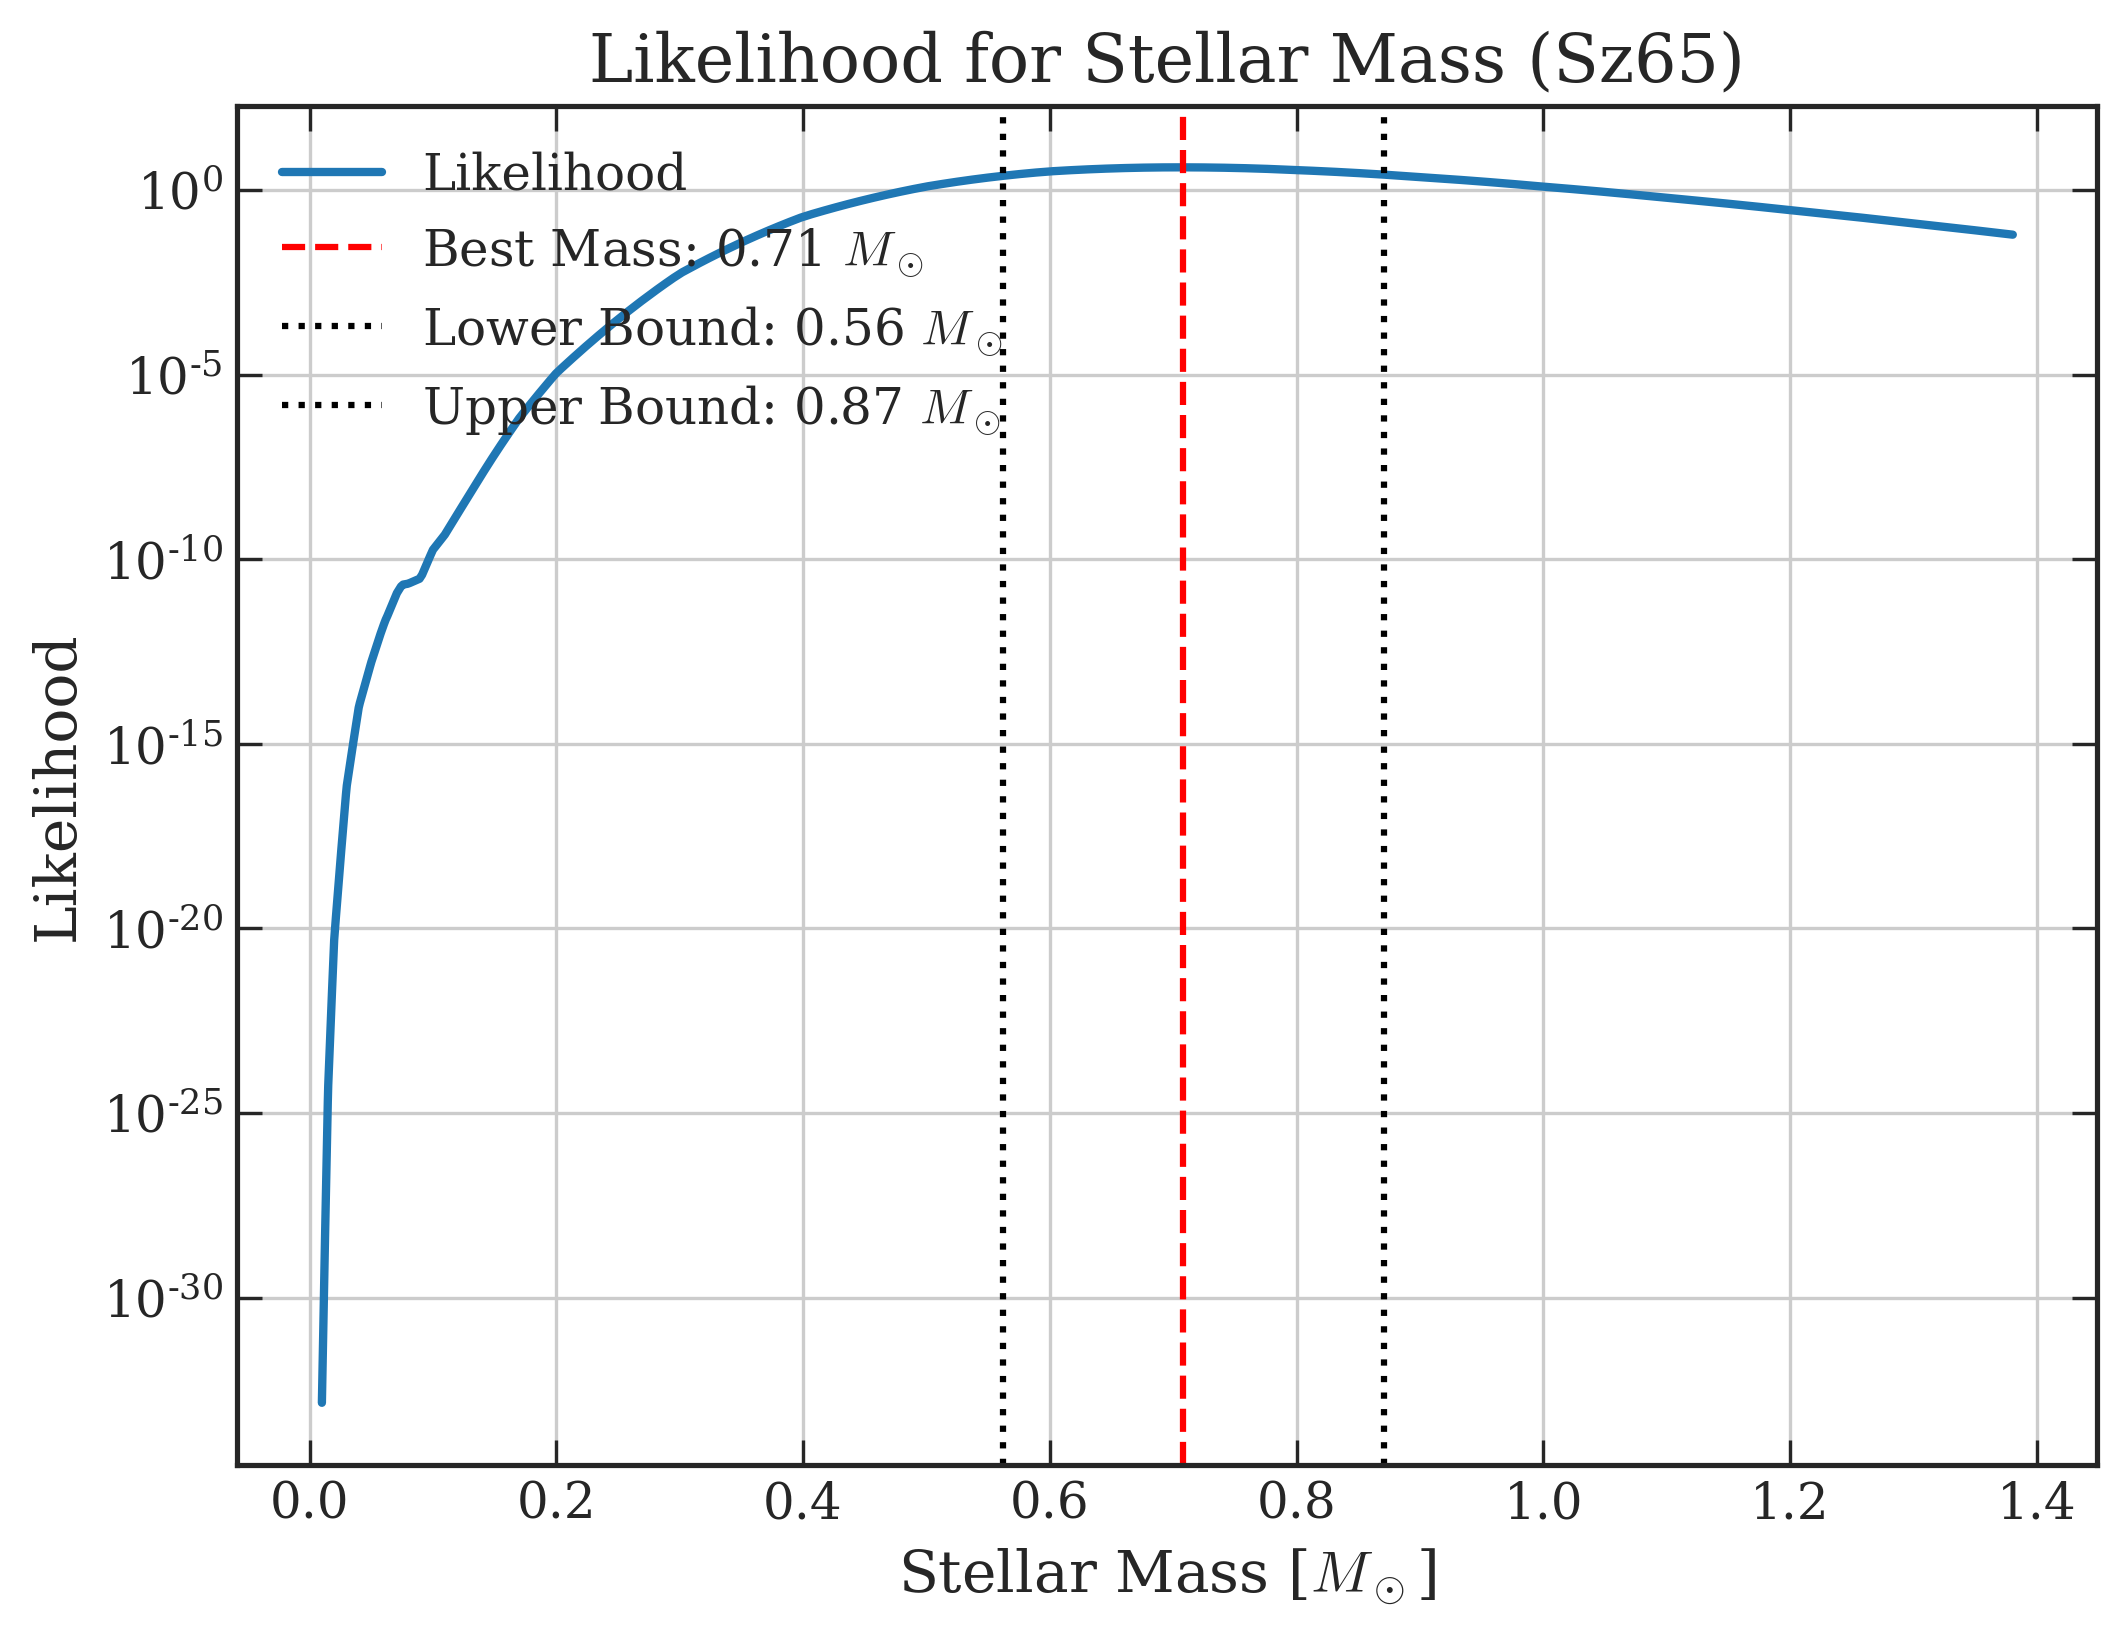

Working on: Sz71
Best match for Sz71: Age = 1.50e+06 yrs, Mass = 4.07e-01 Msun


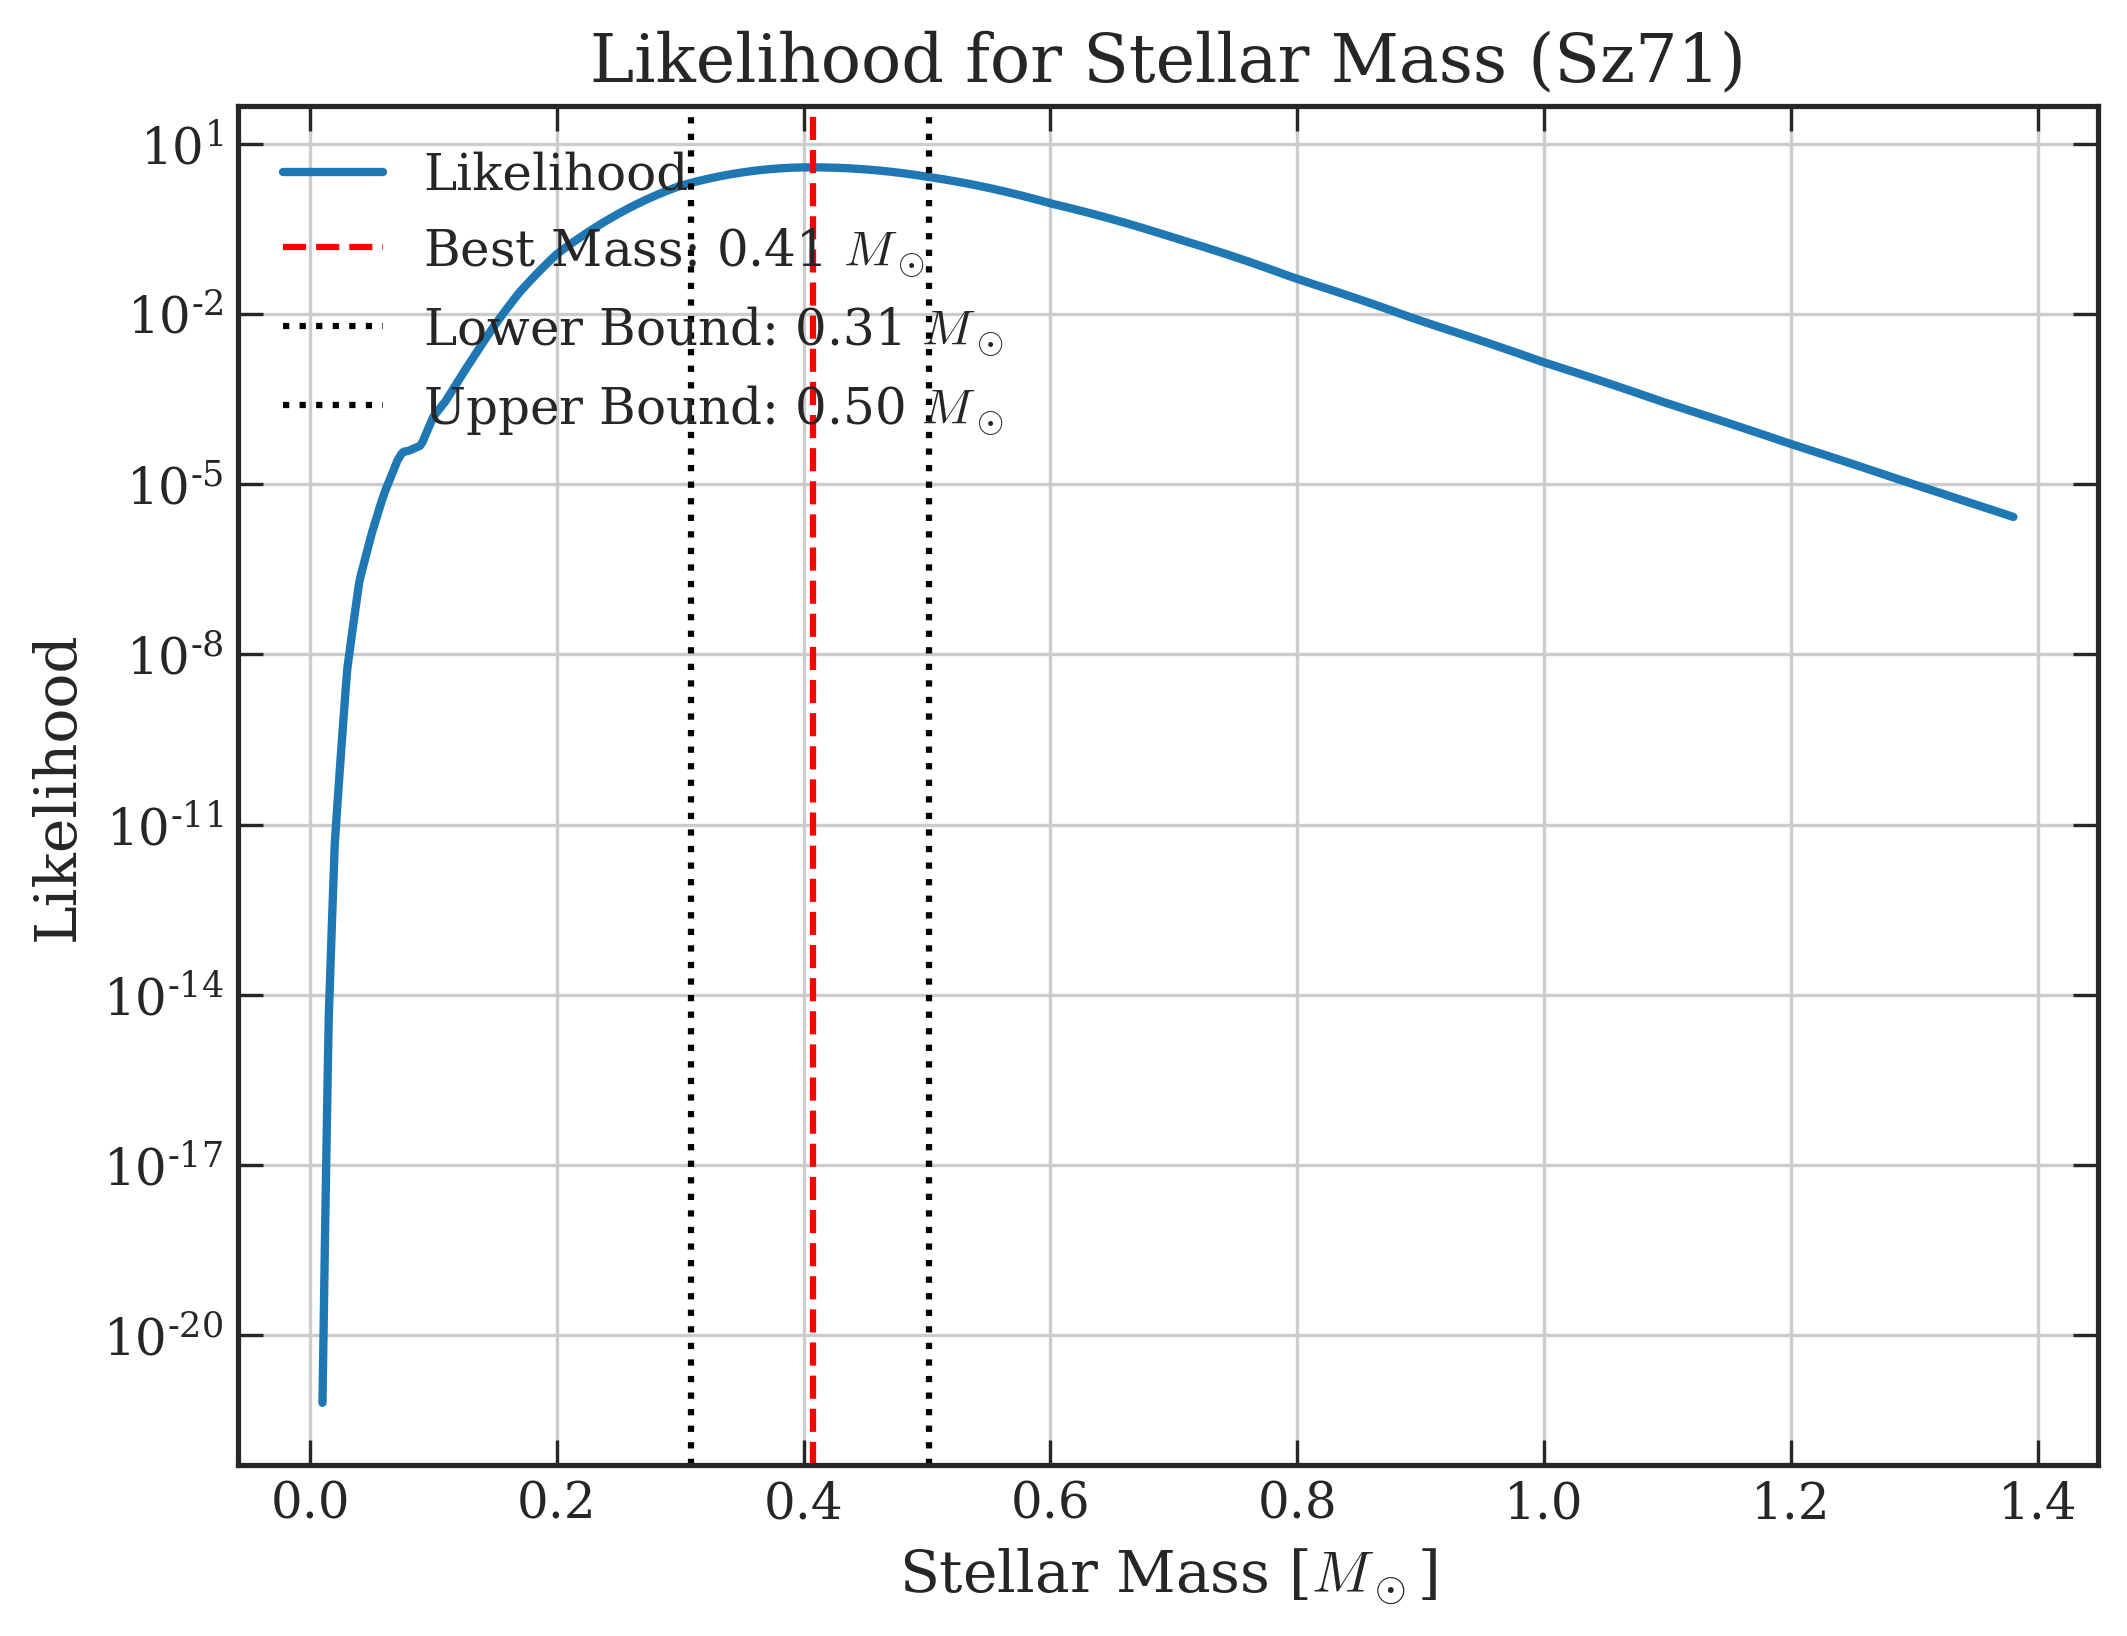

Working on: J16124373-3815031
Best match for J16124373-3815031: Age = 1.50e+06 yrs, Mass = 4.57e-01 Msun


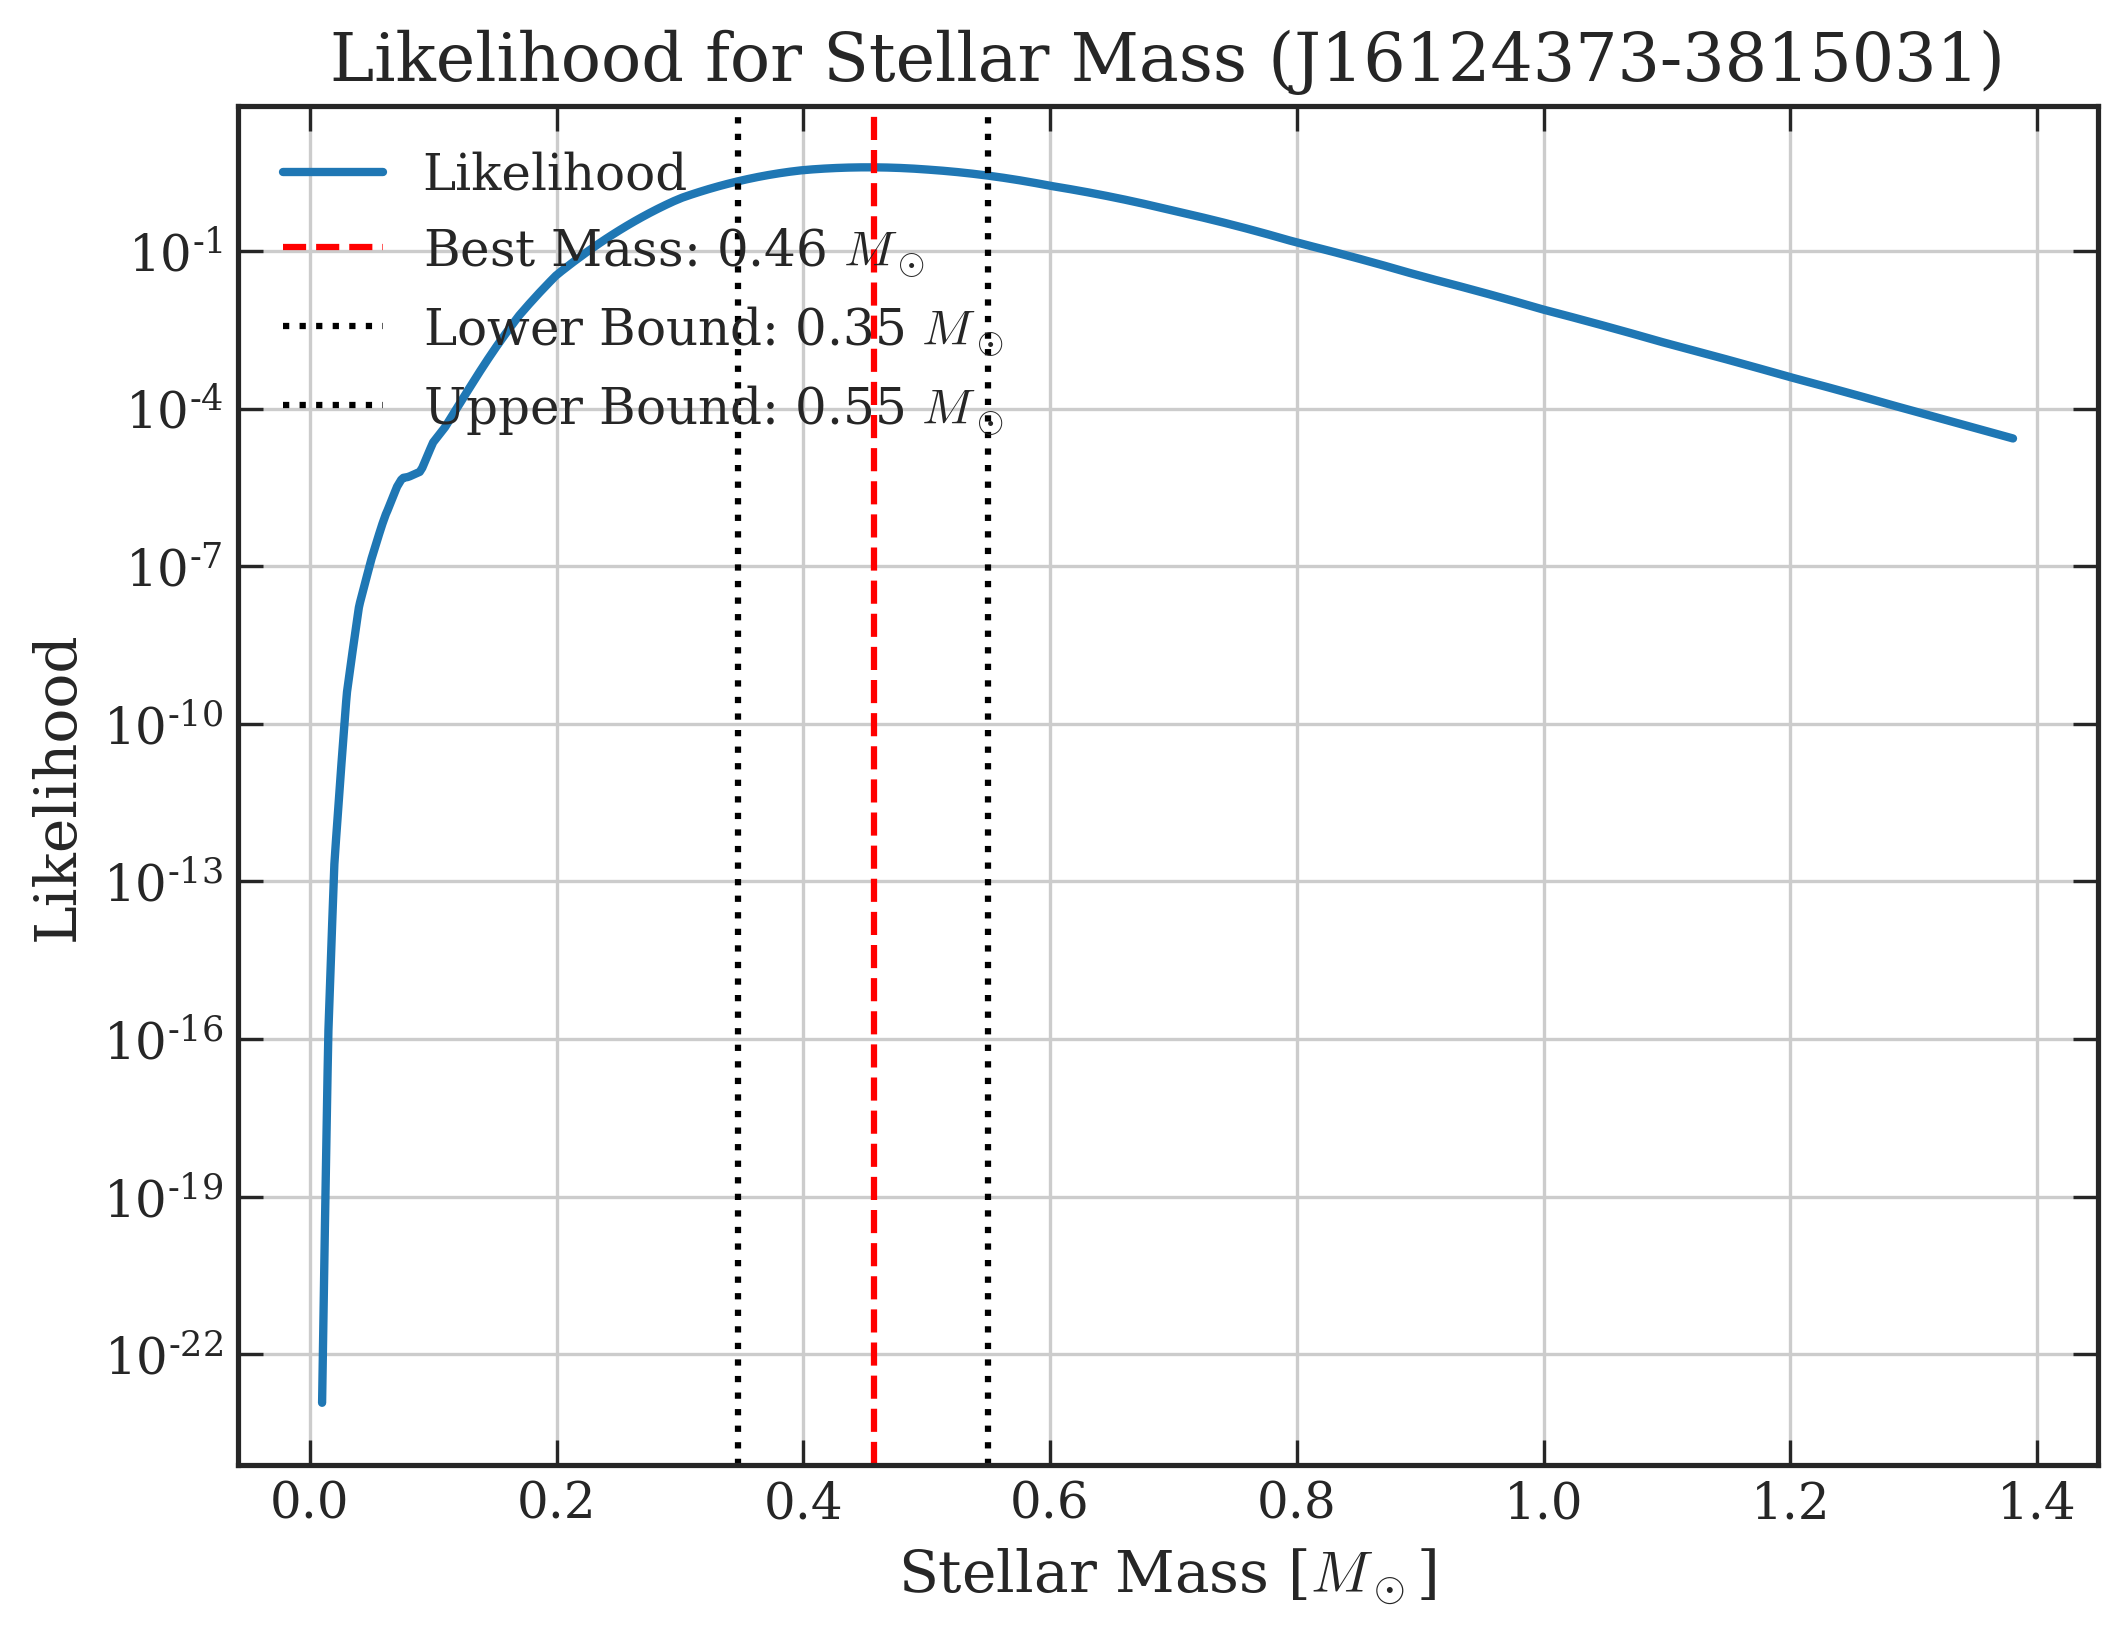

([-0.14999999999999836, -0.38999999999999857, -0.3399999999999985],
 [[0.10000000000000012, 0.09000000000000011],
  [0.1200000000000001, 0.09000000000000008],
  [0.1200000000000001, 0.08000000000000007]])

In [6]:
ysoisochrone.bayesian.derive_stellar_mass_assuming_age(df_prop, assumed_age=1.5e6, method='Baraffe2015', verbose=True, plot=True)

derive stellar mass and age simply finding the closest grid point

In [7]:
ysoisochrone.bayesian.derive_stellar_mass_age_simple(df_prop, method='Baraffe2015', verbose=True)

Working on: Sz65
Closest match for Sz65: Age = 1.41e+06 yrs, Mass = 7.08e-01 Msun
Working on: Sz71
Closest match for Sz71: Age = 1.78e+06 yrs, Mass = 4.17e-01 Msun
Working on: J16124373-3815031
Closest match for J16124373-3815031: Age = 1.62e+06 yrs, Mass = 4.47e-01 Msun


([-0.14999999999999836, -0.37999999999999856, -0.34999999999999853],
 [6.14944999999999, 6.249449999999988, 6.209449999999989])

the full Bayesian framework

/home/dingshandeng/github/ysoisochrone/ysoisochrone/plotting.py:90: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)


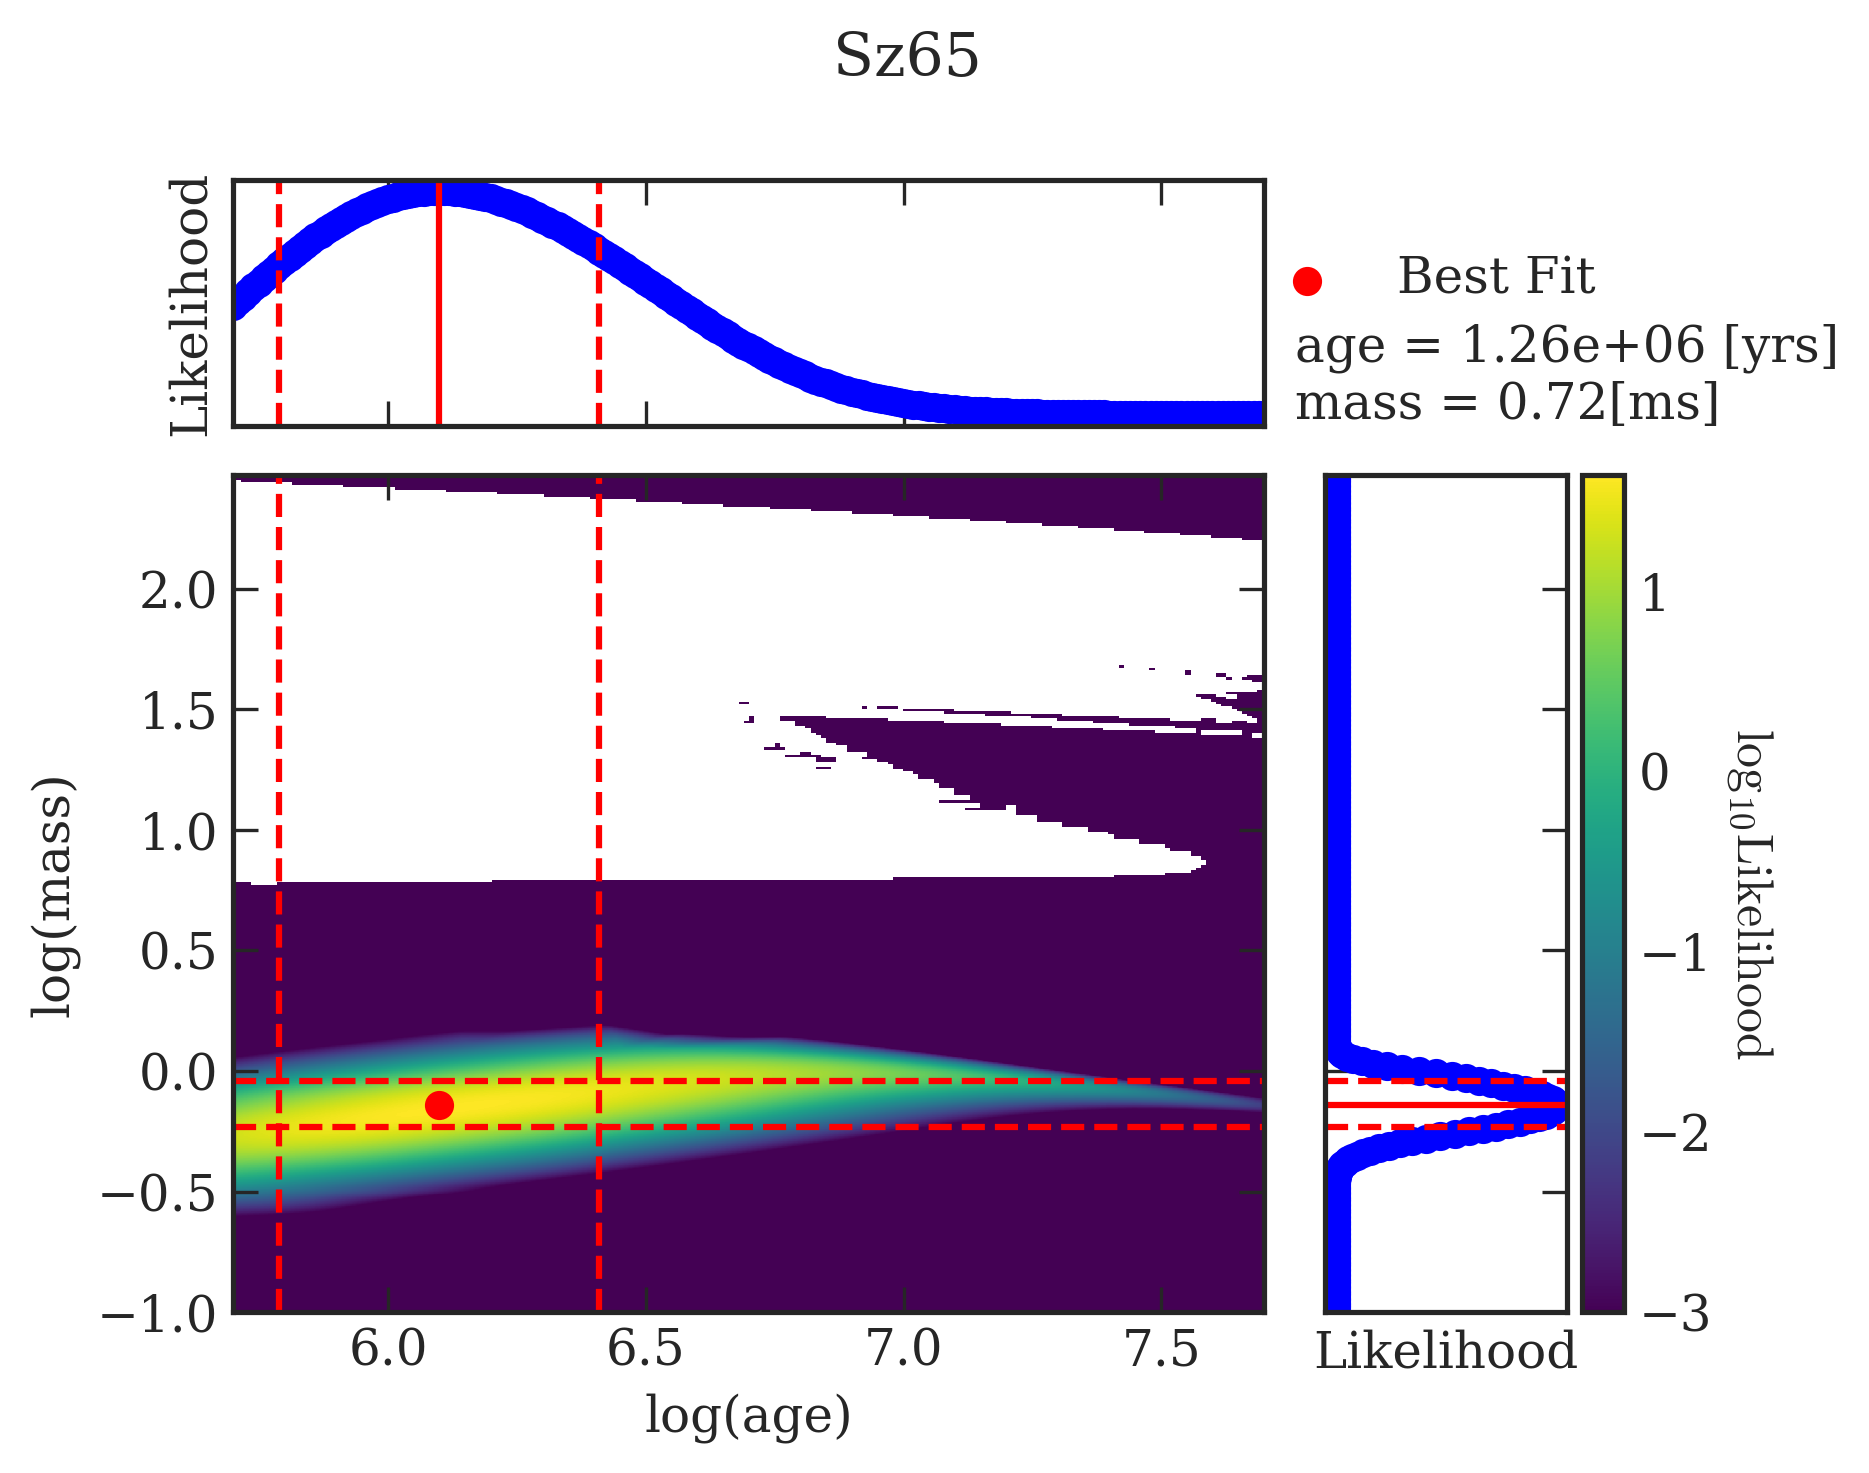

/home/dingshandeng/github/ysoisochrone/ysoisochrone/plotting.py:90: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)


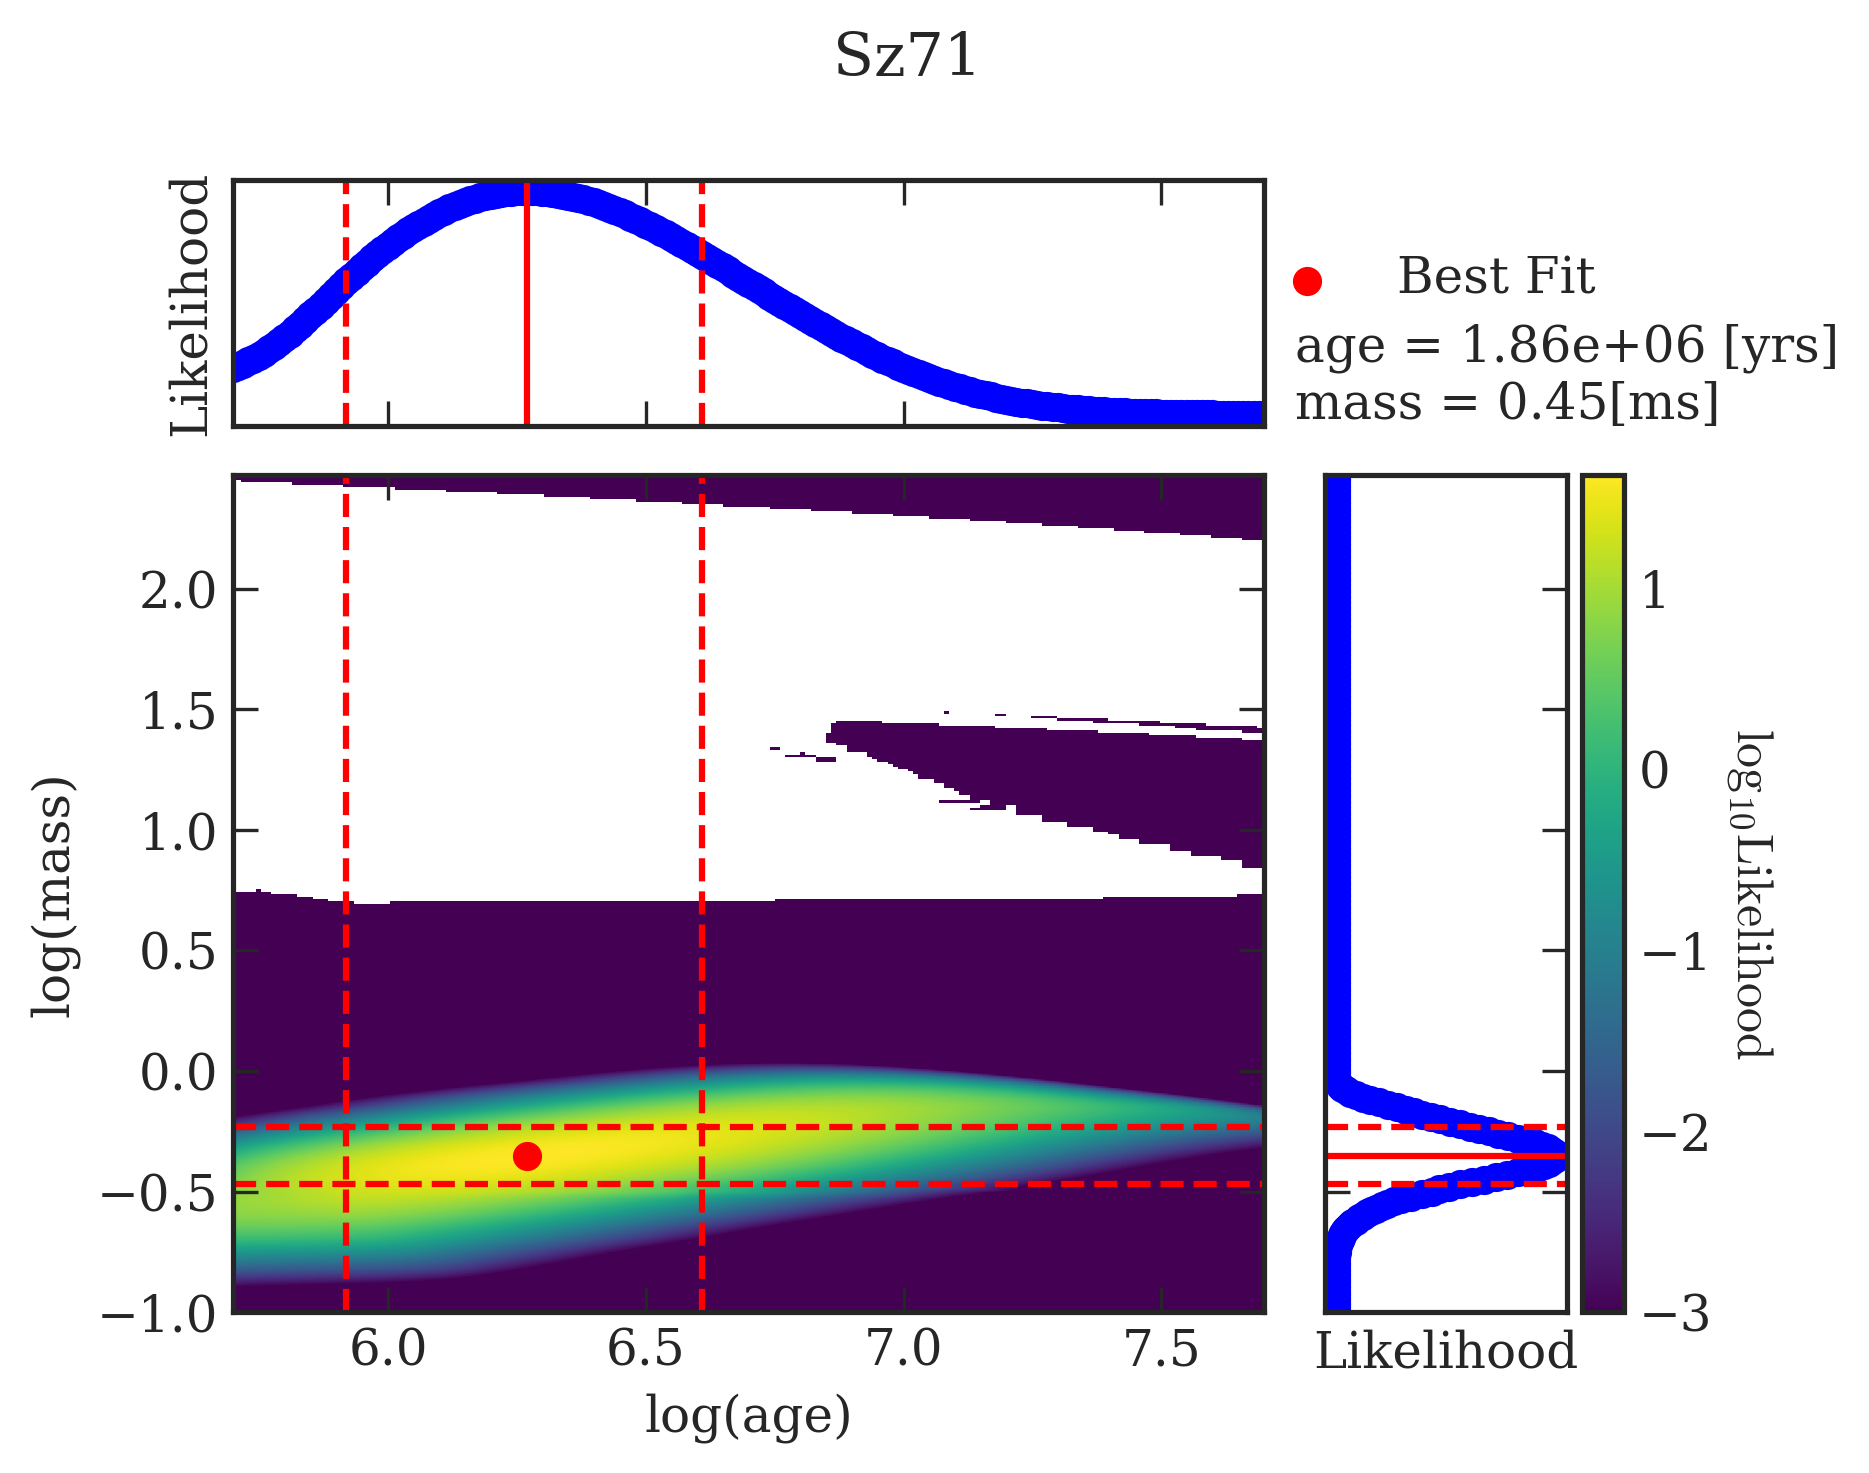

/home/dingshandeng/github/ysoisochrone/ysoisochrone/plotting.py:90: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)


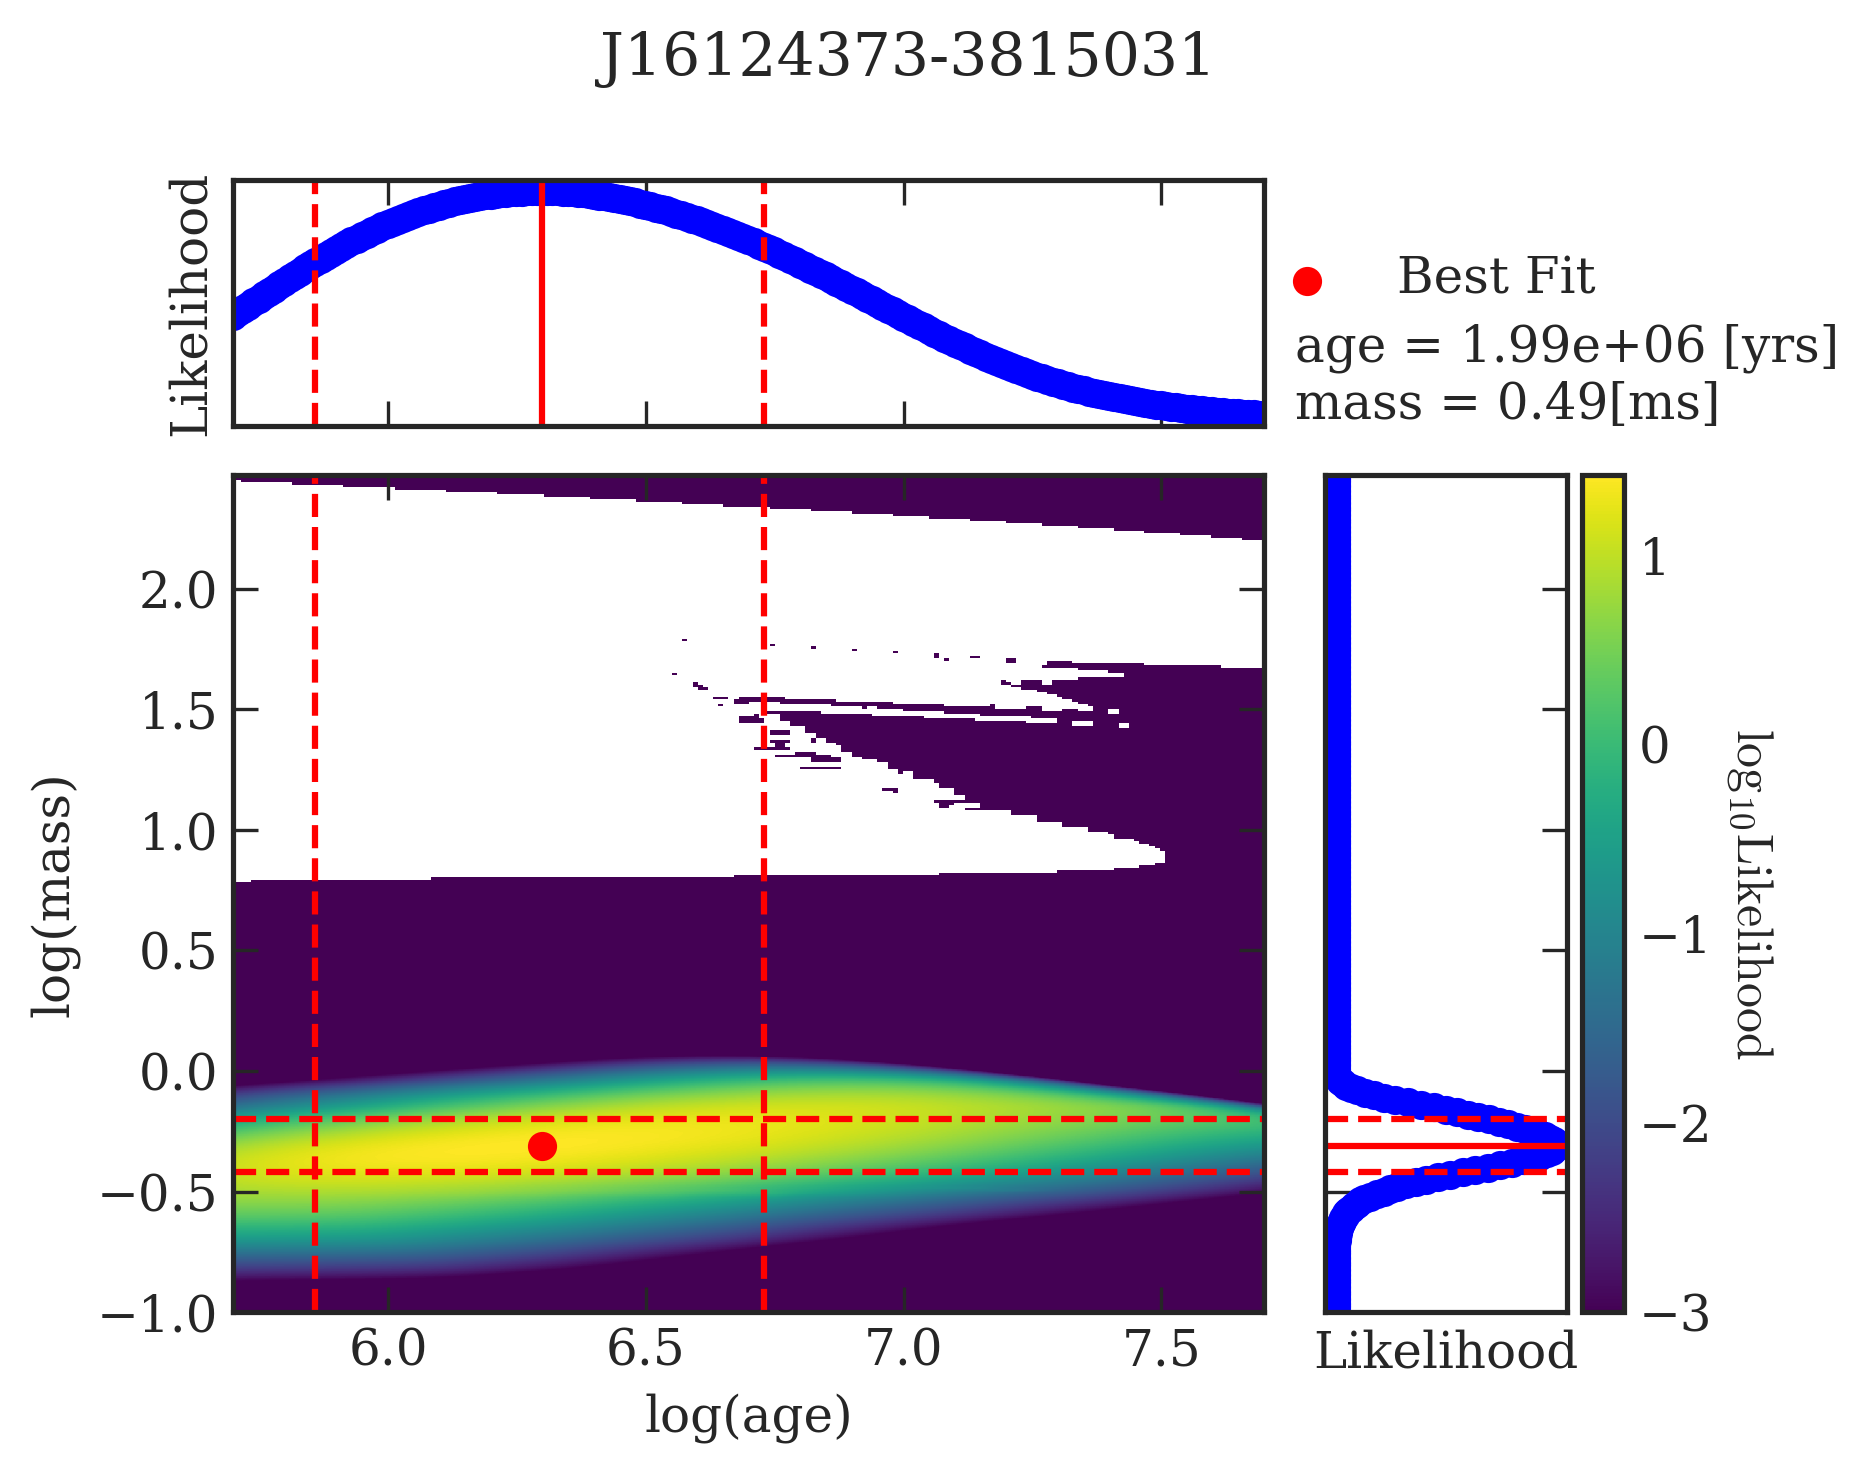

In [8]:
# method can be 
# Please choose from 'Baraffe_n_Feiden', 'Baraffe2015', 'Feiden2016', 'PARSEC_v2p0' (same as 'PARSEC'), 'PARSEC_v1p2',  'MIST_v1p2' (same as 'MIST') or 'custome'. If you want to use the method = 'custome', you need to provide the absolute directory for the isochrone matrix file isochrone_mat_file. See user manual for how to set up your own isochrone matrix.

best_mass_output, best_age_output, lmass_all, lage_all =\
    ysoisochrone.bayesian.derive_stellar_mass_age(df_prop, method='MIST', isochrone_data_dir=None, no_uncertainties=False, plot=True, save_fig=False, save_lfunc=False, fig_save_dir='figures', csv_save_dir='lfunc_data', verbose=False, toofaint=toobright, toobright=toofaint, median_age=median_age)